# LeDebruiteur
* Jonas Freiburghaus
* Romain Capocasale
* He-Arc, INF3dlm-a
* Image Processing course
* 2019-2020

## Noise Reduction Standard Methods

This notebook contains the different methods of noise reduction used as standard in the field of image processing

In [1]:
import os

from debruiteur.generator.datagenerator import DataGenerator
from debruiteur.plots.plots import plot_result_comparison_standard_method
from debruiteur.preprocessing.preprocessor import make_original_dataframe, make_resized_dataframe, make_noised_dataframe
from debruiteur.noise.noise import GaussianNoise, PoissonNoise, UniformNoise, SaltPepperNoise, SquareMaskNoise, SpeckleNoise
from debruiteur.utils.utils import load_model, split_train_val_df
from debruiteur.noise.filters import wiener_filter, laplacian_filter, gaussian_weighted_substract_filter, mean_filter, median_filter, conservative_filter, fft_filter

### Noise type

In [2]:
noise_class_list = [
    GaussianNoise(mean=0, std=20),
    PoissonNoise(),
    UniformNoise(amplitude=100),
    SaltPepperNoise(),
    SquareMaskNoise(mask_shape=(10, 10), freq=0.1),
    SpeckleNoise(),
]

### Load data

In [3]:
working_dir = os.path.abspath(os.getcwd())

df_original = make_original_dataframe(os.path.join(working_dir, "images"))
df_resized = make_resized_dataframe(df_original, img_shape=(100, 100), resized_path=os.path.join(working_dir, "resized_images"))
df_noised = make_noised_dataframe(df_resized, noise_class_list, os.path.join(working_dir, "noised_images"))

### Standard noise reduction methods

In [4]:
img_gen = DataGenerator(df_noised)

#### Wiener filter

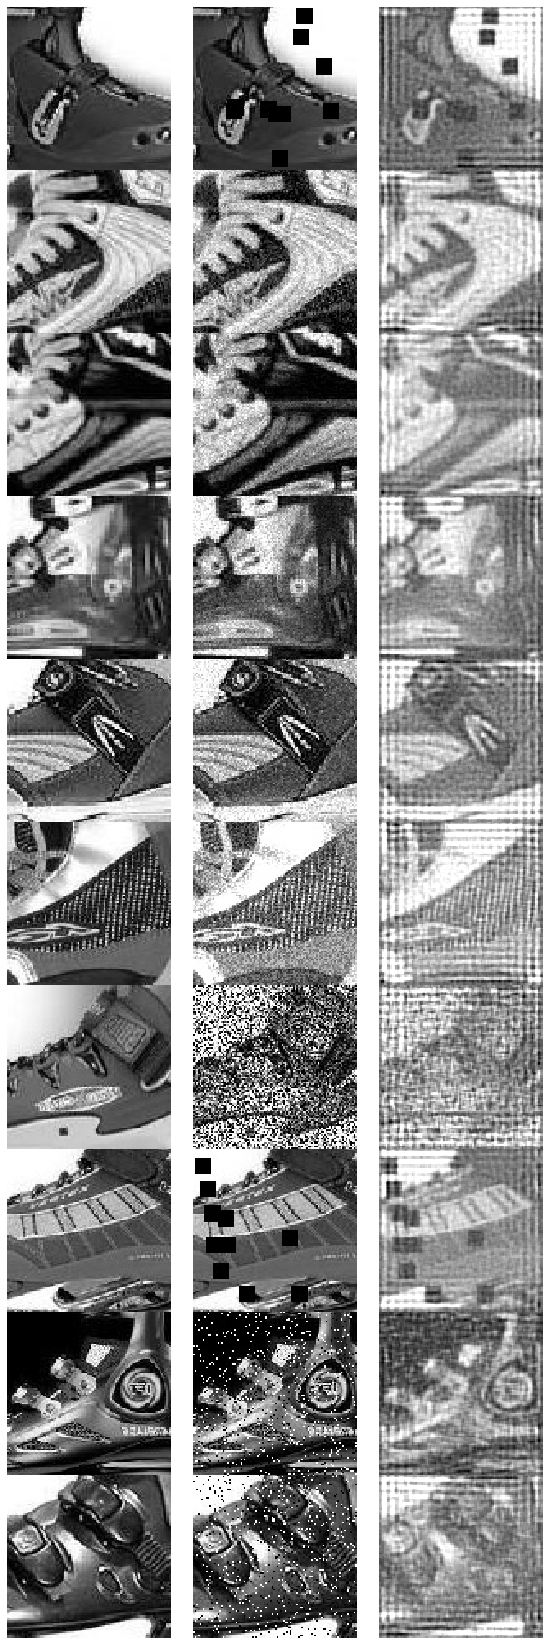

In [5]:
plot_result_comparison_standard_method(wiener_filter, img_gen)

#### Laplacian filter

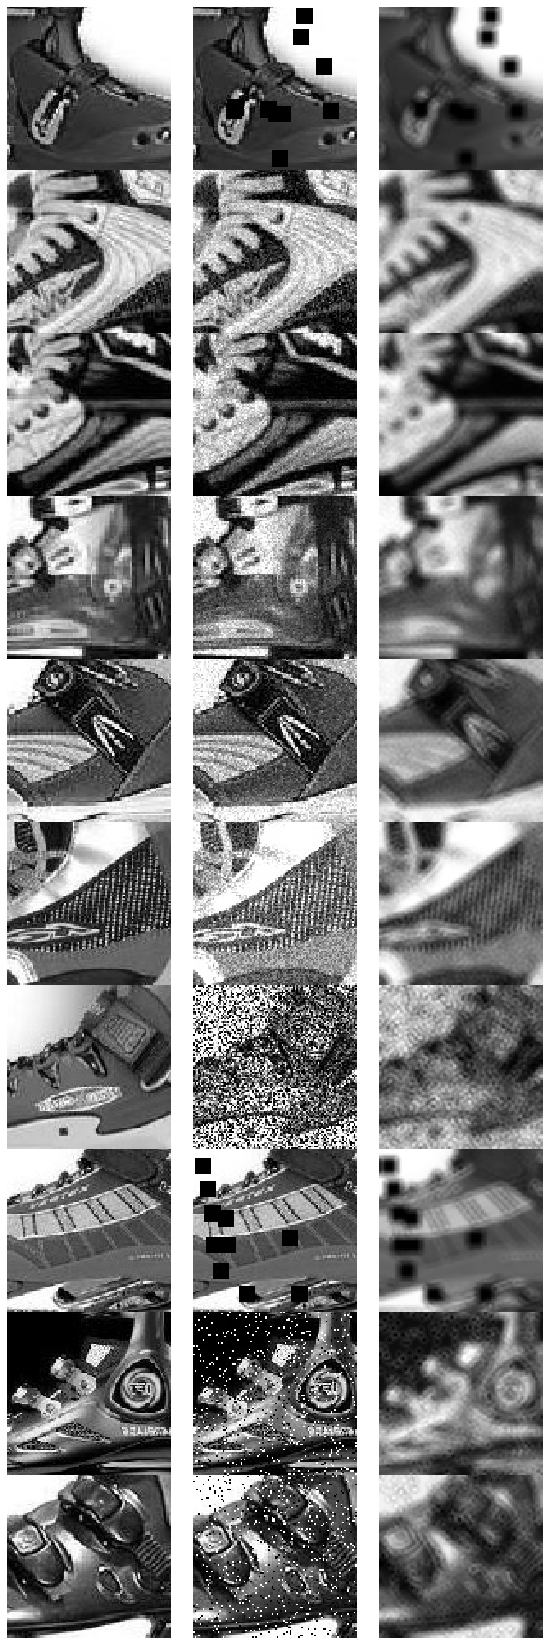

In [6]:
plot_result_comparison_standard_method(laplacian_filter, img_gen)

#### Gaussian weighted substract filter

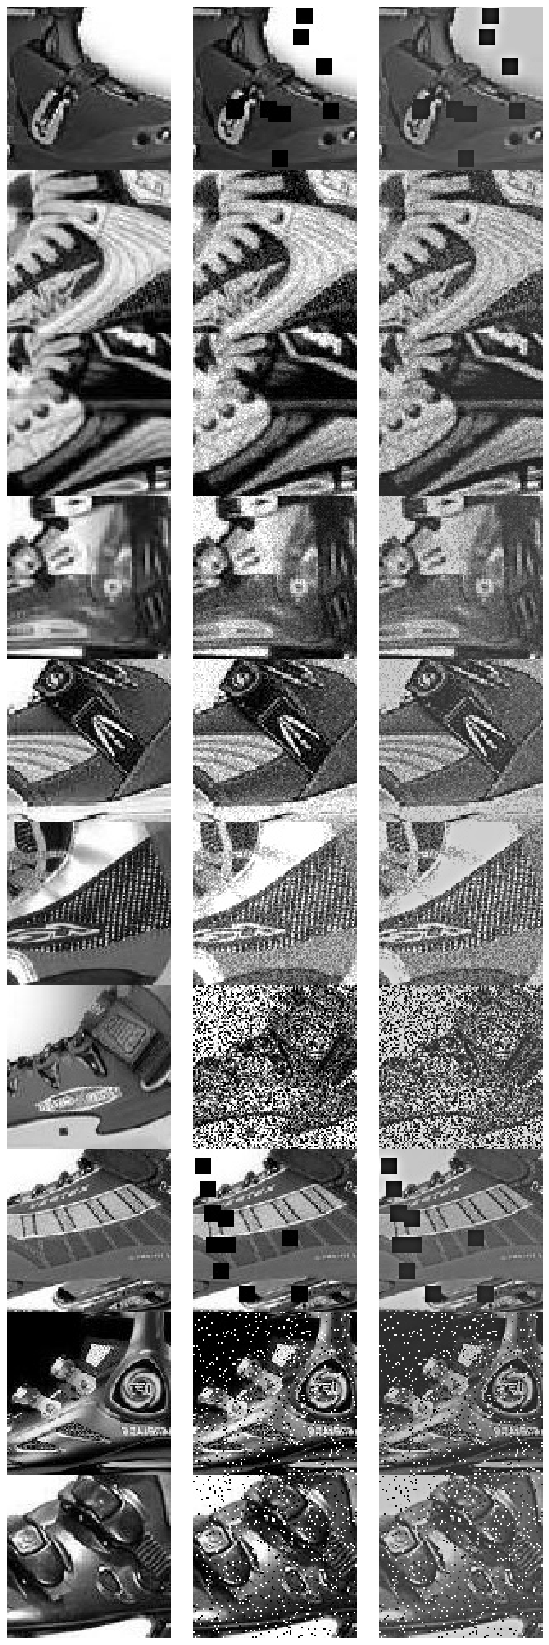

In [7]:
plot_result_comparison_standard_method(gaussian_weighted_substract_filter, img_gen)

#### Mean filter

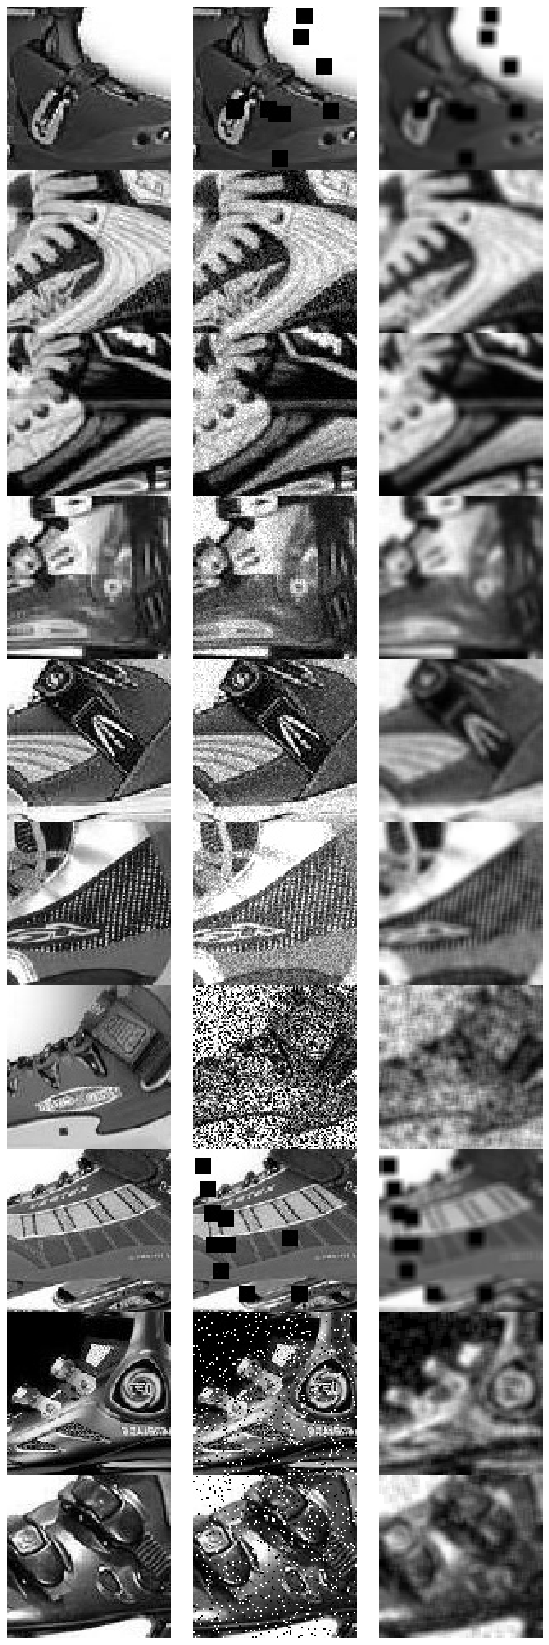

In [8]:
plot_result_comparison_standard_method(mean_filter, img_gen)

#### Median filter


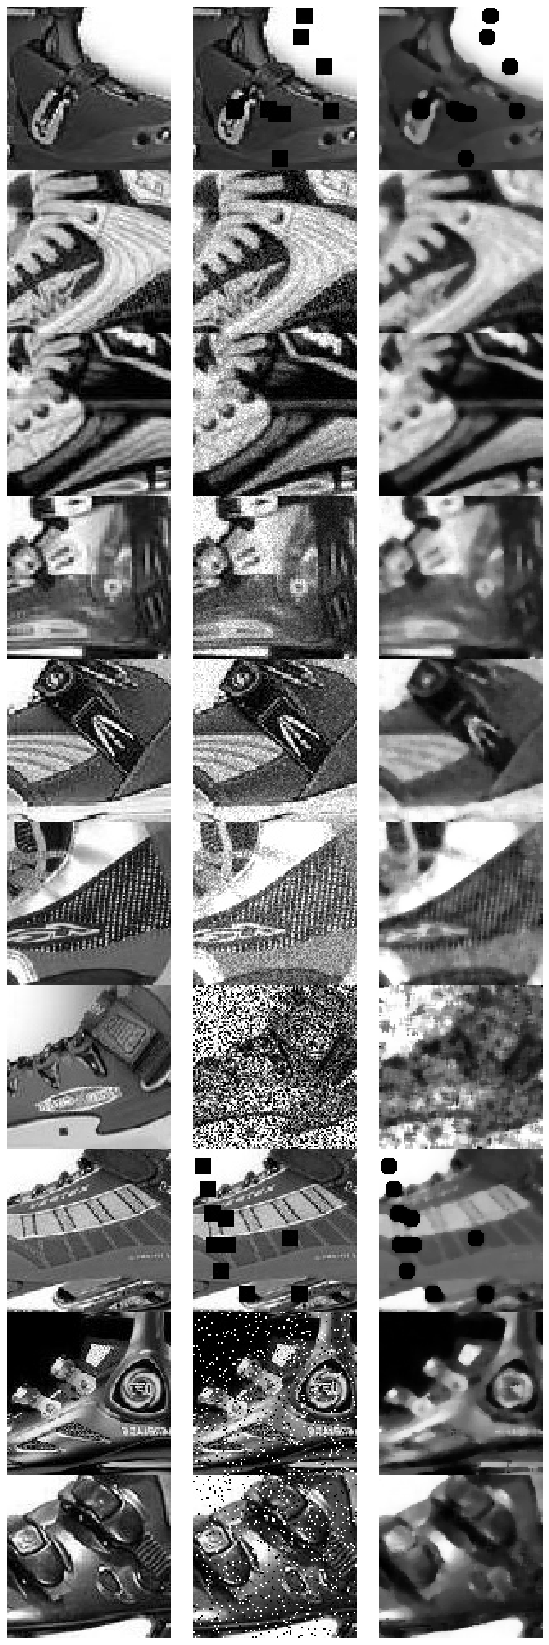

In [9]:
plot_result_comparison_standard_method(median_filter, img_gen)

#### Conservative filter

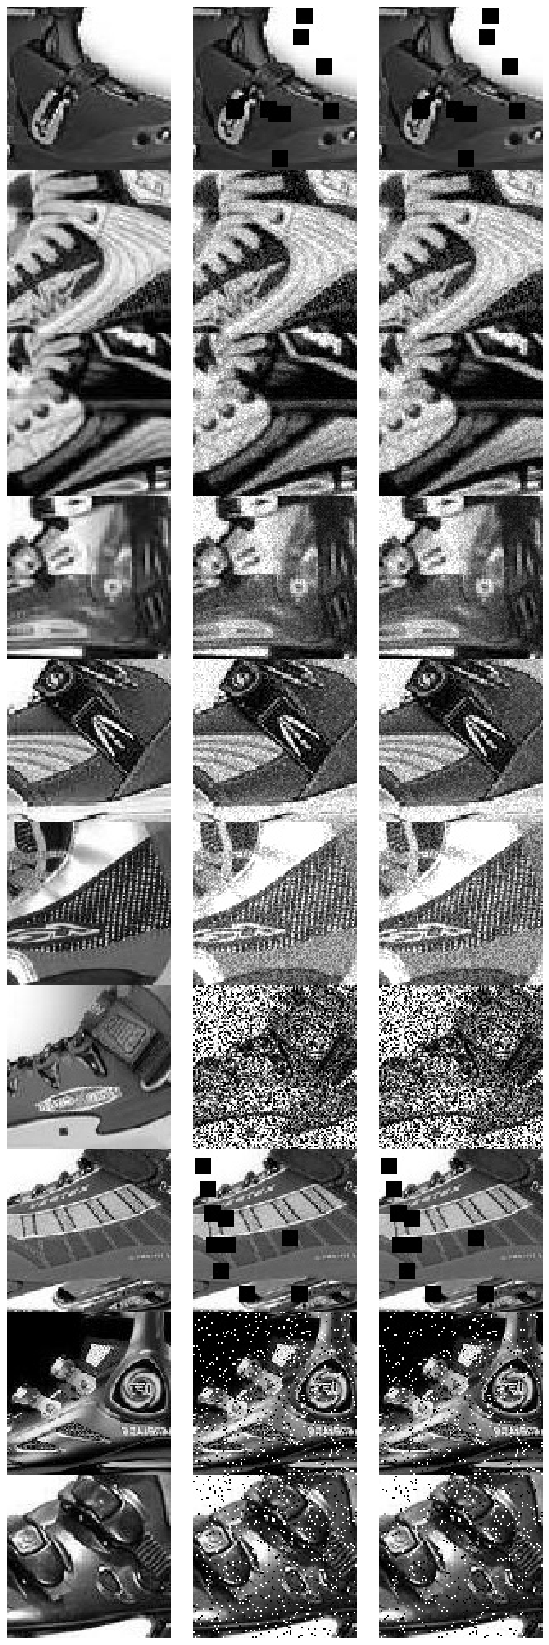

In [10]:
plot_result_comparison_standard_method(lambda x:conservative_filter(x.reshape((100,100))), img_gen)

#### Fast Fourier Transform filter

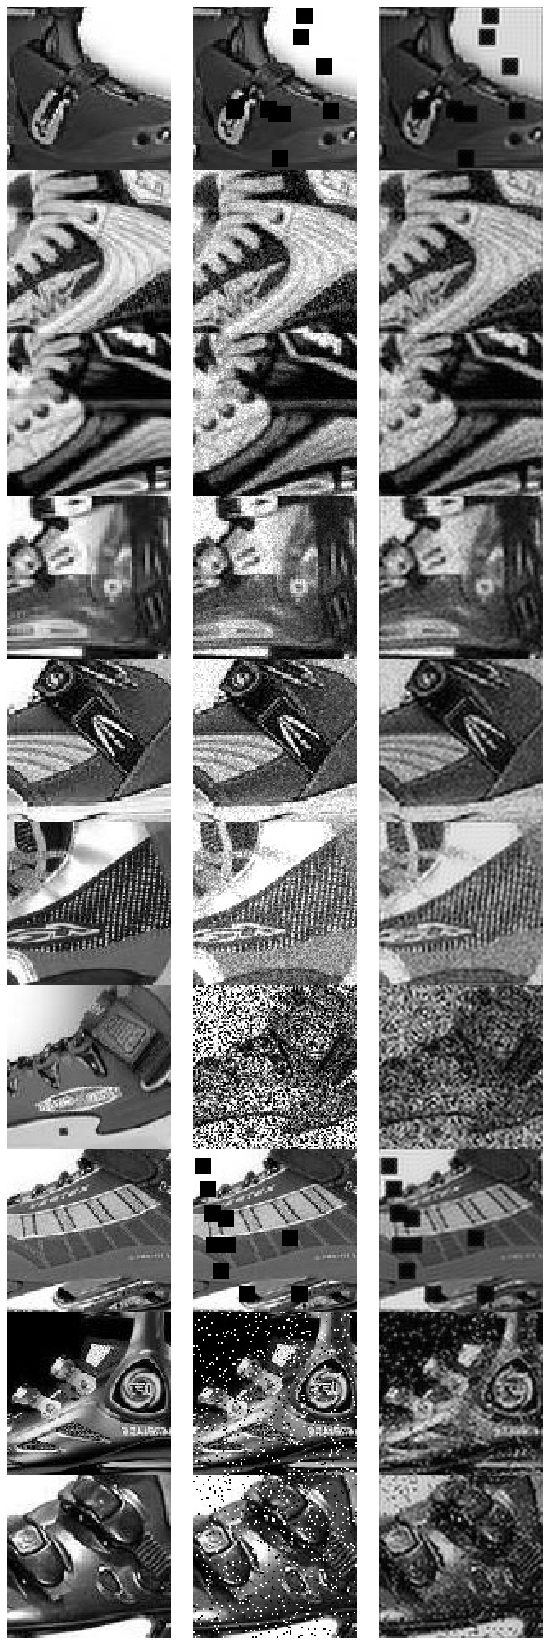

In [11]:
plot_result_comparison_standard_method(fft_filter, img_gen)